In [50]:
# Imports

import torch

from torchtext.data.metrics import bleu_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [51]:
# # Mount google drive

# from google.colab import drive
# drive.mount('/content/drive/')

In [52]:
# %cd /content/drive/MyDrive/Colab Notebooks/CSE-676
# %ls

In [53]:
# Helper functions

from helpers.preprocessing import preprocess_data, split_data
from helpers.model import Encoder, AttentionDecoder
from helpers.training import prepare_dataloader, train
from helpers.evaluation import generate_translation, evaluate

In [54]:
# Global Variables

languages = ['eng', 'fra', 'spa', 'deu', 'por']
LANGUAGE1 = languages[0]
LANGUAGE2 = languages[2]
FILEPATH = f'data/{LANGUAGE1}-{LANGUAGE2}.txt'

# Model tuning parameters

HIDDEN_SIZE = 256
BATCH_SIZE = 32
LEARNING_RATE = 0.001
DROPOUT = 0.1


losses_list = []  # List to store losses for each language pair
accuracies_list = []  # List to store accuracies for each language pair

Data preprocessing

In [55]:
input_language, output_language, line_pairs = preprocess_data(FILEPATH, LANGUAGE1, LANGUAGE2)

train_pairs, test_pairs = split_data(line_pairs, test_size=0.2)

Number of translation pairs: 17917
fra 5699
eng 3703
Number of training pairs: 14333
Number of testing pairs: 3584


Model

In [56]:
# TODO

# basic, gru, lstm, decoder without attention, diff attension mechanism

In [57]:
encoder = Encoder(input_language.n_words, HIDDEN_SIZE, DROPOUT).to(device)
decoder = AttentionDecoder(HIDDEN_SIZE, output_language.n_words, DROPOUT).to(device)

encoder, decoder

(Encoder(
   (encoder_layers): Sequential(
     (0): Embedding(5699, 256)
     (1): Dropout(p=0.1, inplace=False)
     (2): GRU(256, 256, batch_first=True)
   )
 ),
 AttentionDecoder(
   (embedding): Embedding(3703, 256)
   (attention): BahdanauAttention(
     (Wa): Linear(in_features=256, out_features=256, bias=True)
     (Ua): Linear(in_features=256, out_features=256, bias=True)
     (Va): Linear(in_features=256, out_features=1, bias=True)
   )
   (gru): GRU(512, 256, batch_first=True)
   (out): Linear(in_features=256, out_features=3703, bias=True)
   (dropout): Dropout(p=0.1, inplace=False)
 ))

Training

In [58]:
input_language, output_language, train_dataloader = prepare_dataloader(input_language, output_language, train_pairs, BATCH_SIZE)

losses_list, accuracies_list = train(train_dataloader, encoder, decoder, epochs=60, learning_rate=LEARNING_RATE, print_every=5, plot_every=5)


Epoch [5/60], Avg. Loss: 1.0605, Avg. Accuracy: 0.7012
Epoch [10/60], Avg. Loss: 0.2154, Avg. Accuracy: 0.9193
Epoch [15/60], Avg. Loss: 0.0890, Avg. Accuracy: 0.9612
Epoch [20/60], Avg. Loss: 0.0653, Avg. Accuracy: 0.9693
Epoch [25/60], Avg. Loss: 0.0563, Avg. Accuracy: 0.9724
Epoch [30/60], Avg. Loss: 0.0520, Avg. Accuracy: 0.9739
Epoch [35/60], Avg. Loss: 0.0485, Avg. Accuracy: 0.9750
Epoch [40/60], Avg. Loss: 0.0468, Avg. Accuracy: 0.9756
Epoch [45/60], Avg. Loss: 0.0452, Avg. Accuracy: 0.9760
Epoch [50/60], Avg. Loss: 0.0439, Avg. Accuracy: 0.9766
Epoch [55/60], Avg. Loss: 0.0426, Avg. Accuracy: 0.9769
Epoch [60/60], Avg. Loss: 0.0425, Avg. Accuracy: 0.9768


In [59]:
# print( accuracies_list)
# print(losses_list)

In [60]:
print( accuracies_list)
print(losses_list)

[0.5025922308212488, 0.6505801659457081, 0.7281002114573382, 0.7877161534085421, 0.8369739059497869, 0.8762169530822322, 0.9059175853074718, 0.9258611251247812, 0.940233783798289, 0.9484988675761836, 0.9549821280980647, 0.9588892586112513, 0.9622704292476627, 0.9641381235039662, 0.9657696725094727, 0.9674656247651965, 0.9687322220194713, 0.9696768030226592, 0.9699344160235287, 0.9708360615265718, 0.9712654165280208, 0.9722744007814261, 0.9724890782821506, 0.9728003606582012, 0.9732082479095778, 0.9740884256625484, 0.9736483367860631, 0.9733692560351213, 0.9731653124094329, 0.9751296115410625, 0.9745499822891062, 0.9750544744158088, 0.9748934662902654, 0.9752476841664609, 0.975440893917113, 0.9757307085430912, 0.9753764906668957, 0.9757629101681998, 0.9759024505436708, 0.9754623616671855, 0.9761063941693591, 0.9758917166686345, 0.975816579543381, 0.975913184418707, 0.9762029990446851, 0.9760527247941779, 0.9769114347970761, 0.9768470315468587, 0.9763962087953372, 0.9769651041722572, 0.9

Save Model

In [61]:
# Save models

encoder_filepath = f'models/encoder-{LANGUAGE1}-{LANGUAGE2}.pth'
decoder_filepath = f'models/decoder-{LANGUAGE1}-{LANGUAGE2}.pth'

torch.save(encoder.state_dict(), encoder_filepath)
torch.save(decoder.state_dict(), decoder_filepath)

Save Lists

In [62]:
# Save list as a pickle object
import pickle

loss_filename = f'objects/loss_{LANGUAGE2}_{LANGUAGE1}.pkl'
accuracy_filename = f'objects/accuracy_{LANGUAGE2}_{LANGUAGE1}.pkl'

with open(loss_filename, 'wb') as file:
    pickle.dump(losses_list, file)

with open(accuracy_filename, 'wb') as file:
    pickle.dump(losses_list, file)

# Load pickle object back into a list

# with open(loss_filename, 'rb') as file:
#     loss_filename = pickle.load(file)

# with open(accuracy_filename, 'rb') as file:
#     accuracy_filename = pickle.load(file)

# loss_filename, accuracy_filename

Load Model

In [63]:
# Load models

encoder.load_state_dict(torch.load(encoder_filepath))
decoder.load_state_dict(torch.load(decoder_filepath))

<All keys matched successfully>

Evaluation

In [64]:
# Evaluate random training pairs

encoder.eval()
decoder.eval()

references_corpus, candidate_corpus = evaluate(input_language, output_language, encoder, decoder,
                                               train_pairs, evaluate_train=True)

Input Sequence> il n a pas du tout peur des serpents
Target Sequence = ['he', 'is', 'not', 'scared', 'of', 'snakes', 'at', 'all']
Predicted sequence < ['he', 'isn', 't', 'afraid', 'of', 'snakes', 'at', 'all']
Input Sequence> je suis prudent
Target Sequence = ['i', 'm', 'careful']
Predicted sequence < ['i', 'm', 'prudent']
Input Sequence> il est a la maison aujourd hui
Target Sequence = ['he', 'is', 'at', 'home', 'today']
Predicted sequence < ['he', 'is', 'at', 'home', 'today']
Input Sequence> je suis contente de voir que tu es heureux
Target Sequence = ['i', 'm', 'glad', 'to', 'see', 'that', 'you', 're', 'happy']
Predicted sequence < ['i', 'm', 'glad', 'to', 'see', 'that', 'you', 're', 'happy']
Input Sequence> vous imaginez des choses
Target Sequence = ['you', 're', 'imagining', 'things']
Predicted sequence < ['you', 're', 'imagining', 'things']
Input Sequence> je suis amoureux de votre fille
Target Sequence = ['i', 'm', 'in', 'love', 'with', 'your', 'daughter']
Predicted sequence < ['

In [65]:
# Evaluate testing pairs

candidate_corpus, references_corpus = evaluate(input_language, output_language, encoder, decoder,
                                                test_pairs, evaluate_train=False, iterations=len(test_pairs))

Input Sequence> je suis vraiment amoureuse de toi
Target Sequence = ['i', 'm', 'really', 'in', 'love', 'with', 'you']
Predicted sequence < ['i', 'm', 'really', 'in', 'love', 'with', 'you']
Input Sequence> elle a peur des chats
Target Sequence = ['she', 'is', 'afraid', 'of', 'cats']


Predicted sequence < ['she', 's', 'afraid', 'of', 'a', 'good', 'teacher']
Input Sequence> je suis habitue a travailler toute la nuit
Target Sequence = ['i', 'm', 'used', 'to', 'working', 'all', 'night']
Predicted sequence < ['i', 'm', 'used', 'to', 'working', 'all', 'night']
Input Sequence> ils sont amis
Target Sequence = ['they', 're', 'friends']
Predicted sequence < ['they', 're', 'friends']
Input Sequence> je suis presque aveugle
Target Sequence = ['i', 'm', 'almost', 'blind']
Predicted sequence < ['i', 'm', 'nearly', 'blind']
Input Sequence> j essaye d arreter tom
Target Sequence = ['i', 'm', 'trying', 'to', 'stop', 'tom']
Predicted sequence < ['i', 'm', 'trying', 'to', 'quit', 'tom']
Input Sequence> tu es dans l erreur
Target Sequence = ['you', 're', 'wrong']
Predicted sequence < ['you', 're', 'on', 'the', 'wrong', 'road']
Input Sequence> nous sommes les nouveaux proprietaires
Target Sequence = ['we', 're', 'the', 'new', 'owners']
Predicted sequence < ['we', 're', 'the', 'new', 't

Benchmark

In [66]:
bleu = bleu_score(candidate_corpus, references_corpus)

bleu

0.5200908780097961

Analysis

In [67]:
bleu

0.5200908780097961

In [68]:
bleu_score_percentage = bleu * 100
# bleu_score_percentage
print(f"BLEU Score: {bleu_score_percentage:.2f}%")

BLEU Score: 52.01%


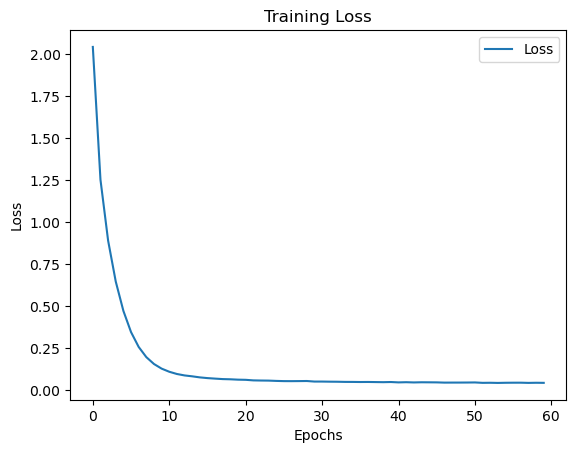

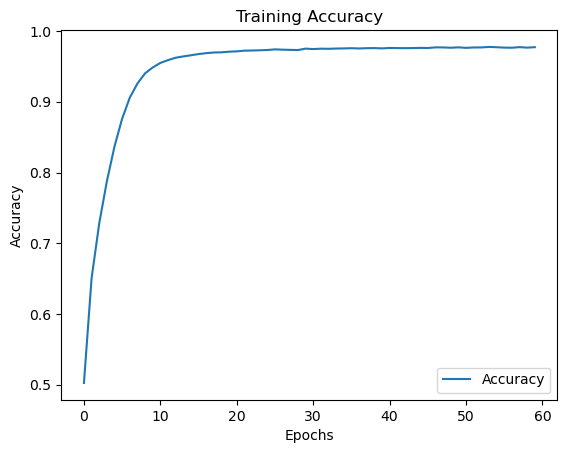

In [69]:
import matplotlib.pyplot as plt

# Plotting loss for the first language pair
plt.plot(losses_list, label='Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.savefig('training_loss.png')  # Save the loss plot as an image
plt.show()
plt.close()  # Close the plot to start a new one

# Plotting accuracies for the first language pair
plt.plot(accuracies_list, label='Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.savefig('training_accuracy.png')  # Save the accuracy plot as an image
plt.show()
plt.close()  # Close the plot

# # Display the saved images
# from IPython.display import Image, display
# display(Image(filename='training_loss.png'))
# display(Image(filename='training_accuracy.png'))
